In [19]:
import numpy as np

In [20]:
import sklearn.datasets

In [21]:
iris=sklearn.datasets.load_iris()

In [151]:
x=iris.data[:-1,:2]

In [152]:
x.shape

(149, 2)

In [11]:
y=(iris.target!=0)*1

In [154]:
y=y[:-1]

In [155]:
y.shape

(149,)

In [13]:
import matplotlib.pyplot as mpt

In [17]:
one=zip(x,y)

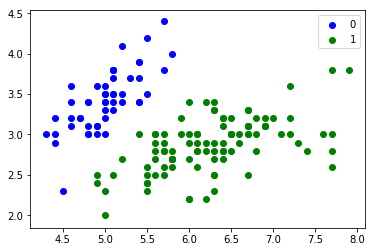

In [156]:
mpt.scatter(x[y==0][:,0],x[y==0][:,1],color='b',label='0')
mpt.scatter(x[y==1][:,0],x[y==1][:,1],color='g',label='1')
mpt.legend()
mpt.show()

In [158]:
x_test=iris.data[149,:2]
x_test

array([5.9, 3. ])

In [138]:
#logistic regression
class logistic_regrssion:
    def __init__(self,lr=0.01,iteration=10000,fit_intercept=True,verbose=False):
        self.lr=lr
        self.iteration=iteration
        self.fit_intercept=fit_intercept
     
    def _add_intercept(self,x):
        intercept=np.ones((x.shape[0],1))
        return np.concatenate((x,intercept),axis=1)
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def loss(self,h,y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self,x,y):
        if self.fit_intercept:
            x=self._add_intercept(x)
            
        self.theta=np.zeros(x.shape[1])
        z=np.dot(x,self.theta)
        h=self.sigmoid(z)
            
        for i in range(self.iteration):
            
            gradient=np.dot(x.T,(h-y))/len(y)
            self.theta-=self.lr*gradient
            z=np.dot(x,self.theta)
            h=self.sigmoid(z)
            
            loss=self.loss(h,y)
            
        print(loss)
        
    def predict(self,x):
        if self.fit_intercept:
            x=self._add_itercept(x)
        temp=self.sigmoid(np.dot(x,self.theta))    
        return temp.round() 
    def predit_prob(self,x):
        if self.fit_intercept:
            x=self._add_intercept(x)
            return self.sigmoid(np.dot(x,self.theta))  


In [147]:
model=logistic_regrssion(lr=0.1,iteration=300000)

In [148]:
%time model.fit(x,y)

0.007750607165267898
CPU times: user 36.1 s, sys: 99.4 ms, total: 36.2 s
Wall time: 18.2 s


In [149]:
model.theta

array([ 12.523156  , -13.40150447, -25.89066442])

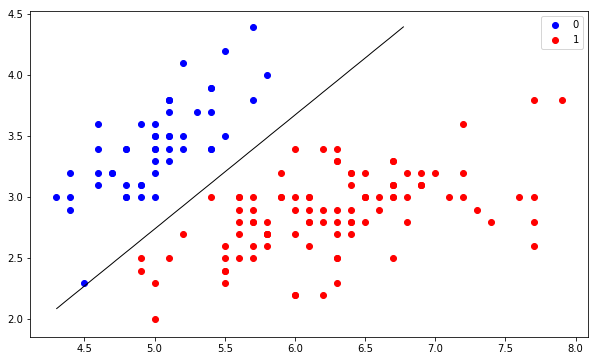

In [150]:
mpt.figure(figsize=(10, 6))
mpt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='b', label='0')
mpt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='1')
mpt.legend()
x1_min, x1_max = x[:,0].min(), x[:,0].max(),
x2_min, x2_max = x[:,1].min(), x[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predit_prob(grid).reshape(xx1.shape)
mpt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')